                        Twitter Bot Analysis

On the course of our analysis we focused on the following features :
    Time Difference Value ( the amortized value of time between each tweet), 
    Skew Rate ( the ratio of followers to following ),
    Number of retweets (In integer values),
    Bot or Not Score (Using the Truthy project API) ,
    Decision(Yes/No)

LR: 0.788889 (0.175330)
LDA: 0.955556 (0.054433)
KNN: 0.677778 (0.104822)
Tree: 0.988889 (0.033333)
NB: 0.777778 (0.179161)
SVM: 0.566667 (0.195316)


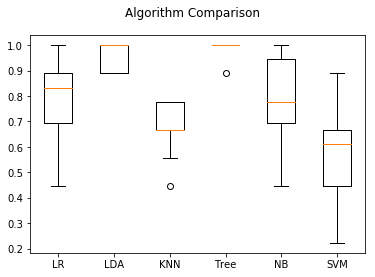

0.5
[[4 3]
 [2 1]]
             precision    recall  f1-score   support

         No       0.67      0.57      0.62         7
        Yes       0.25      0.33      0.29         3

avg / total       0.54      0.50      0.52        10



In [3]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


url = "data.csv"
names = [ 'Time Difference Value', 'Skew Rate','Number of retweets','Bot or Not Score','Decision' ]
dataset = pandas.read_csv(url, names=names)
#cols_to_transform = [ 'victim.industry.name' ]
#data = pandas.get_dummies( dataset, columns = cols_to_transform )
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

models  = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


LR: 0.688889 (0.184592)
LDA: 0.433333 (0.135628)
KNN: 0.666667 (0.099381)
Tree: 0.622222 (0.133333)
NB: 0.644444 (0.209644)
SVM: 0.555556 (0.185924)


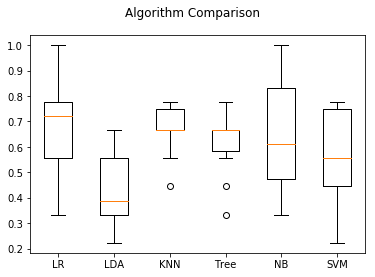


K-Nearest Neighbours Classification Analysis
0.5
[[4 3]
 [2 1]]
             precision    recall  f1-score   support

         No       0.67      0.57      0.62         7
        Yes       0.25      0.33      0.29         3

avg / total       0.54      0.50      0.52        10



In [23]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


url = "data3_nontruthy.csv"
names = [ 'Time Difference Value', 'Skew Rate','Number of retweets','Decision' ]
dataset = pandas.read_csv(url, names=names)
#cols_to_transform = [ 'victim.industry.name' ]
#data = pandas.get_dummies( dataset, columns = cols_to_transform )
array = dataset.values
X = array[:,0:3]
Y = array[:,3]

validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

models  = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

print('\nK-Nearest Neighbours Classification Analysis')

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [25]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

url = "data.csv"
names = [ 'Time Difference Value', 'Skew Rate','Number of retweets','Bot or Not Score','Decision' ]
dataset = pandas.read_csv(url, names=names)
array = dataset.values
X = array[:90,0:4]
Y = array[:90,4]
test_idx = array[90:100,0:4]

clf = DecisionTreeClassifier()
clf.fit(X,Y)

predictions = clf.predict(test_idx)
print('\n     Decision Tree Classification Analysis')
print('\nPredictions:')
print(predictions)
print(accuracy_score(array[90:100,4], predictions))
print(confusion_matrix( array[90:100,4], predictions))
print(classification_report(array[90:100,4], predictions))


     Decision Tree Classification Analysis

Predictions:
['Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes']
1.0
[[6 0]
 [0 4]]
             precision    recall  f1-score   support

         No       1.00      1.00      1.00         6
        Yes       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        10



In [28]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

url = "data3_nontruthy.csv"
names = [ 'Time Difference Value', 'Skew Rate','Number of retweets','Decision' ]
dataset = pandas.read_csv(url, names=names)
array = dataset.values
X = array[:90,0:3]
Y = array[:90,3]
test_idx = array[90:100,0:3]

clf = DecisionTreeClassifier()
clf.fit(X,Y)

predictions = clf.predict(test_idx)
print('\n     Decision Tree Classification Analysis Without Truthy Score')
print('\nPredictions:')
print( predictions )
print(accuracy_score(array[90:100,3], predictions))
print(confusion_matrix( array[90:100,3], predictions))
print(classification_report(array[90:100,3], predictions))


     Decision Tree Classification Analysis Without Truthy Score

Predictions:
['No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No']
0.3
[[3 3]
 [4 0]]
             precision    recall  f1-score   support

         No       0.43      0.50      0.46         6
        Yes       0.00      0.00      0.00         4

avg / total       0.26      0.30      0.28        10



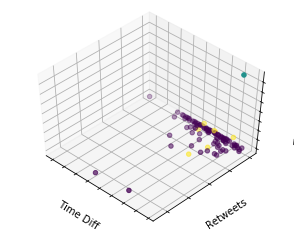

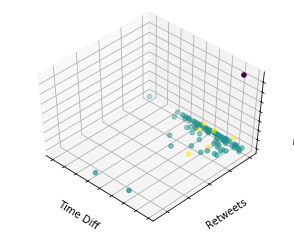

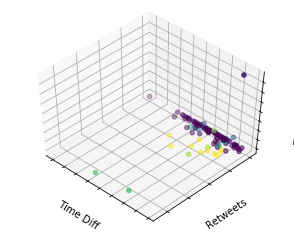

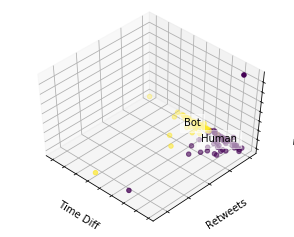

In [64]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

#Non-Truthy clustering
#url = "data3_nontruthy.csv"
#names = [ 'Time Difference Value', 'Skew Rate','Number of retweets', 'Decision' ]
#Non-Truthy clustering

#Truthy clustering - 1
url = "data4_no_skew.csv"
names = ['Time Diff', 'Retweets','Truthy Score','Decision']
#Truthy clustering - 1

#Truthy clustering - 2
#url = "data5_no_retweets.csv"
#names = ['Time Difference Value', 'Skew Rate','Truthy Score','Decision']
#Truthy clustering - 2

#Truthy clustering - 3
#url = "data6_no_timediff.csv"
#names = ['Skew Rate','Number of retweets','Truthy Score','Decision']
#Truthy clustering - 3

s1 = names[0]
s2 = names[1]
s3 = names[2]


dataset = pandas.read_csv(url, names=names)
array = dataset.values
X = array[:,0:3]
y = array[:,3]


estimators = {'k_means_3_clusters': KMeans(n_clusters=3),
              'k_means_8_clusters': KMeans(n_clusters=8),
              'k_means_random': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 2], X[:, 0], X[:, 1], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    

    ax.set_xlabel(s1)
    ax.set_ylabel(s2)
    ax.set_zlabel(s3)
    
    fignum = fignum + 1


fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Human', 0),
                    ('Bot', 1)]:
    ax.text3D(X[y == label, 2].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 1].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(y.astype(int), [0.0 , 1.0 ]).astype(np.float)

ax.scatter(X[:, 2], X[:, 0], X[:, 1], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(s1)
ax.set_ylabel(s2)
ax.set_zlabel(s3)
plt.show()